## Problem Statement
The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean
Ambient temperature (AT) C â€“6.23 37.10 17.71
Ambient pressure (AP) mbar 985.85 1036.56 1013.07
Ambient humidity (AH) (%) 24.08 100.20 77.87
Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
Turbine after temperature (TAT) C 511.04 550.61 546.16
Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
Turbine energy yield (TEY) MWH 100.02 179.50 133.51
Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [1]:
#importing requried libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset using pandas
gas = pd.read_csv('gas_turbines.csv')

## Performing EDA

In [3]:
#displaying  first 5 records 
gas.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
#displaying last 5 records
gas.tail()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227
15038,6.9279,1007.2,97.533,3.4275,19.306,1049.9,545.85,111.58,10.583,4.9816,92.498


In [5]:
#shape of dataset
gas.shape   

(15039, 11)

Dataset has `15039` rows and `11` columns

In [6]:
gas.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [7]:
#creating copy of original dataset so if we made any changes it won't effect our original datset
gas_data = gas.copy()

In [8]:
gas_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [9]:
gas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values). Note: the info() method actually prints the info.

In [10]:
gas_data.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


The features are not on the same scale. For example AP has a mean of `1013.19` and CO has a mean value of `1.97`. Features should be on the same scale for algorithms such as (gradient descent) to converge smoothly. Let's go ahead and check further.

In [11]:
gas_data.ndim

2

In [12]:
gas_data.axes

[RangeIndex(start=0, stop=15039, step=1),
 Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
        'NOX'],
       dtype='object')]

axes is a function of the matplotlib library that adds axes to the current graph and makes it as current axes.

In [13]:
#checking unique values
gas_data.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [14]:
gas_data.corr()["TEY"].sort_values(ascending=False)

TEY     1.000000
CDP     0.988473
GTEP    0.977042
TIT     0.891587
AFDP    0.717995
AP      0.146939
NOX    -0.102631
AH     -0.110272
AT     -0.207495
CO     -0.541751
TAT    -0.720356
Name: TEY, dtype: float64

In [15]:
new_data=pd.cut(gas_data['TEY'],bins=[0.0,140.0,180.0],labels=['Low','High'])
gas_data.insert(0,'new_TEY',new_data)

In [16]:
gas_data.head()

,new_TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,Low,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,Low,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,Low,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,Low,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,Low,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [17]:
#removing TEY columne as we wont requires it
gas_data=gas_data.drop(columns='TEY',axis=1,inplace=False)

In [18]:
gas_data=gas_data.rename({'new_TEY':'TEY'},axis=1)

In [19]:
gas_data[gas_data['TEY']=='High']

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
26,High,5.9958,1024.2,82.376,4.6570,28.128,1099.7,543.28,12.935,0.78039,82.101
28,High,7.9304,1023.7,76.271,4.6570,28.433,1096.2,540.40,13.055,1.12220,75.403
29,High,9.3818,1022.8,56.158,4.6340,28.221,1100.1,543.62,12.971,0.91143,83.766
30,High,10.0050,1022.4,55.943,4.5008,27.325,1100.3,547.24,12.813,0.99325,87.119
31,High,10.1970,1022.3,57.235,4.6544,28.375,1099.8,543.21,12.873,0.93630,80.353
...,...,...,...,...,...,...,...,...,...,...,...
14951,High,8.0589,1031.2,85.986,4.8726,30.035,1094.4,533.39,13.437,0.89657,69.412
14963,High,5.2822,1030.1,94.844,4.8530,29.311,1099.6,538.60,13.337,1.13450,75.627
14964,High,7.0311,1030.1,93.637,4.8118,29.298,1099.7,539.13,13.237,0.80091,74.359
14965,High,8.9323,1029.4,84.612,4.5057,27.478,1099.6,545.83,12.726,0.40559,77.507


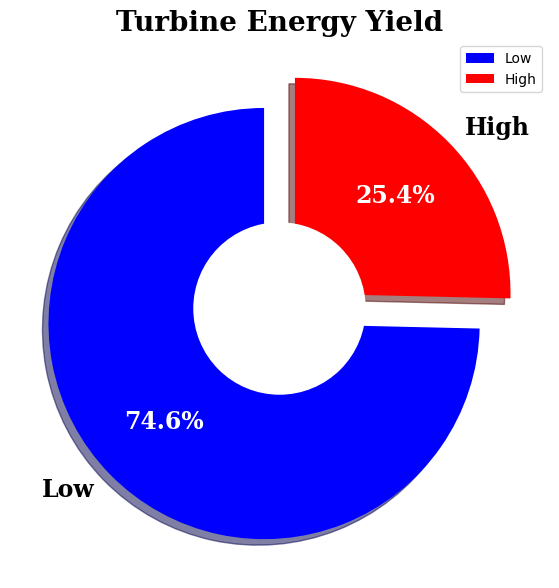

In [20]:
label_data=gas_data['TEY'].value_counts()

explode=(0.1,0.1)
plt.figure(figsize=(12,7))
patches, texts, pcts= plt.pie(label_data,labels=label_data.index,colors=['blue','red'],pctdistance=0.65,shadow=True,
                             startangle=90,explode=explode,autopct='%1.1f%%',
                             textprops={'fontsize':17,'color':'black','weight':'bold','family':'serif'})
plt.setp(pcts,color='white')
hfont={'weight':'bold','family':'serif'}
plt.title('Turbine Energy Yield',size=20,**hfont)

centre_circle=plt.Circle((0,0),0.40,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(['Low','High'],loc="upper right")
plt.show()

<h4>Observations:</h4>
1. As we can see that the percentage of turbine energy yield, the low average of energy production is high<br>
2. Low energy yield got percentage of 75%<br>
3. High energy yield got percentage of 25%<br>
4. Higher net energy yields and energy ratios correspond to better performance from an energy point of view<br>
5. So, we can predict that there should be more high turbin energy must be yields for better performance 

In [21]:
gas_data.columns

Index(['TEY', 'AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO',
       'NOX'],
      dtype='object')

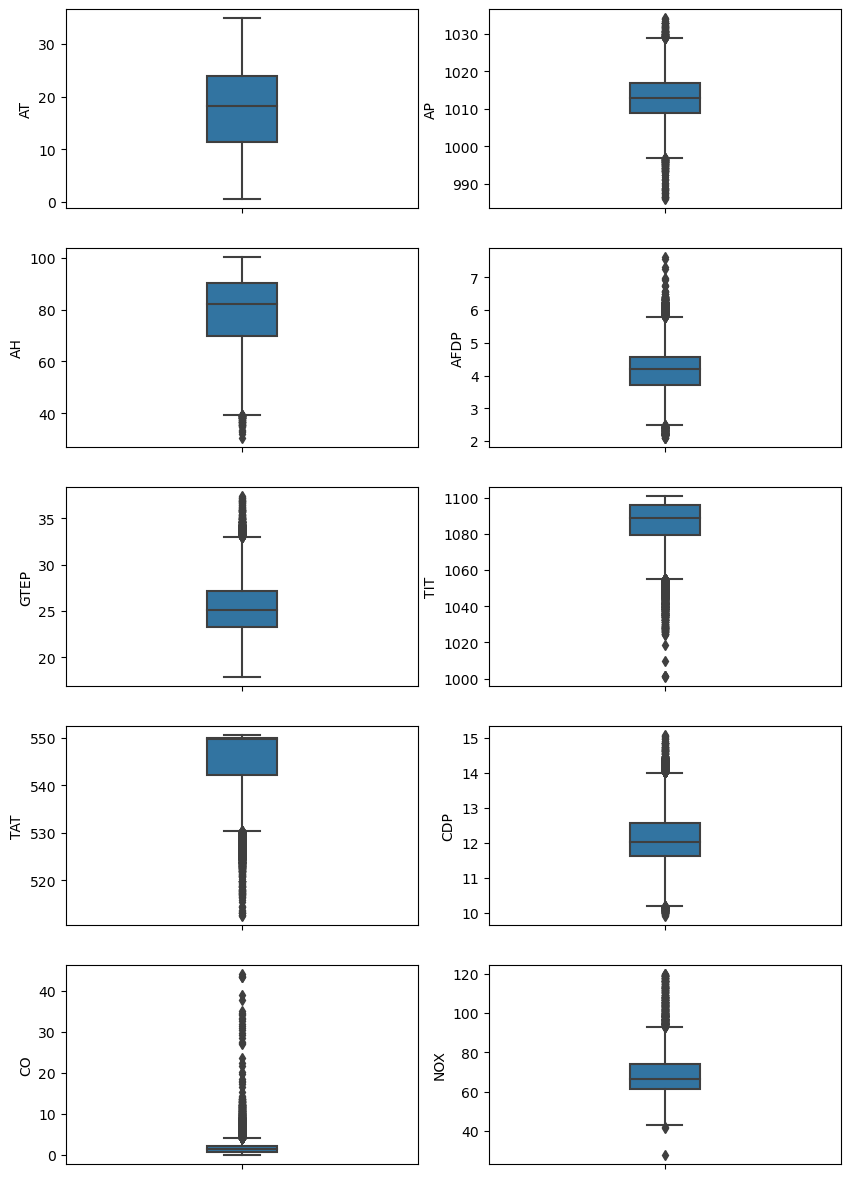

In [22]:
# Drawing boxplot for indepent variables with continuous values
cols = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']
plt.figure(figsize=(10,15))

i=1
for col in cols:
    plt.subplot(5,2,i)
    sns.boxplot(y=col, data=gas_data,width=0.2)
    i+=1
plt.show()

<h4>Observations:</h4>
1. The Turbine inlet temperature (TIT) has the highest mean all among the others<br>
2. Carbon monoxide (CO) has the lowest mean<br>
3. Except Ambient temperature (AT) all other contains outliers<br>
4. Ambient temperature (AT) has large IQR range<br>

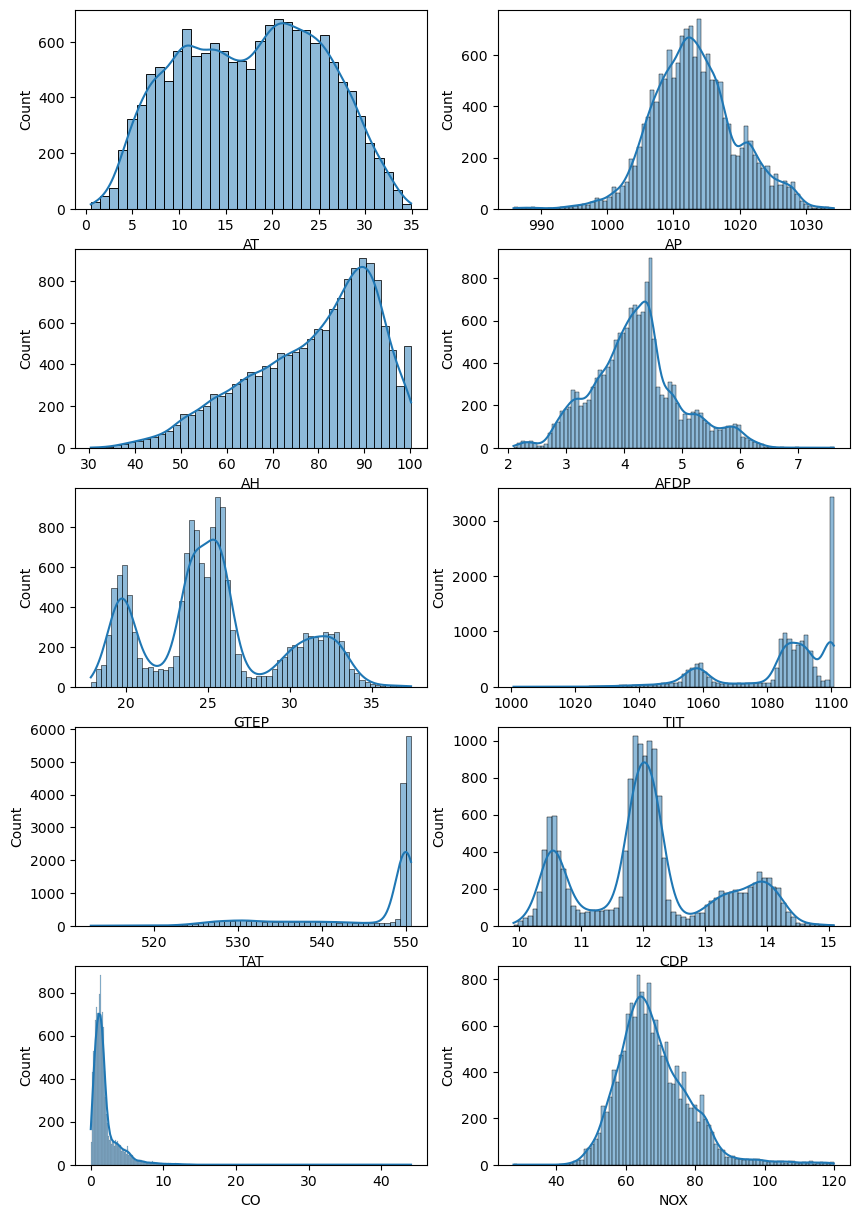

In [23]:
# Drawing boxplot for indepent variables with continuous values
cols = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']
plt.figure(figsize=(10,15))

i=1
for col in cols:
    plt.subplot(5,2,i)
    sns.histplot(x=col, data=gas_data,kde=True)
    i+=1
plt.show()

<h4>Observations:</h4>
1. Some of the features are normally distributed.<br> 
2. The features AH, CO, TITy and TATa exhibit the highest skew coefficients. Moreover, the distribution of Carbon Mono oxide (CO) and Turbine inlet temperature (TIT) and Turbine after temperature (TAT) seem to contain many outliers. <br>
3. The Ambient pressure (AP) and Nitrogen oxides (NOx) are showing the graph in normal distribution which means it is symmetric around the mean<br>
4. Where Ambient humidity (AH) is showing left skewed distribution which means mode is greater than mean and median<br>
5. Carbon monoxide (CO) is showing righ skewed distribution which means mean is greater than mode and median<br>
6. All the other's feature we can't see any common distribution among them<br>

In [24]:
gas_data['TEY']=gas_data['TEY'].map({'High':0,'Low':1})

In the dataset the `TEY` feature having the data in categorical.So, using map function we are converting it into numeric so the predication will ne fast and easier

In [25]:
gas_data.head()

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,1,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,1,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,1,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,1,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311


In [26]:
gas_data.columns

Index(['TEY', 'AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO',
       'NOX'],
      dtype='object')

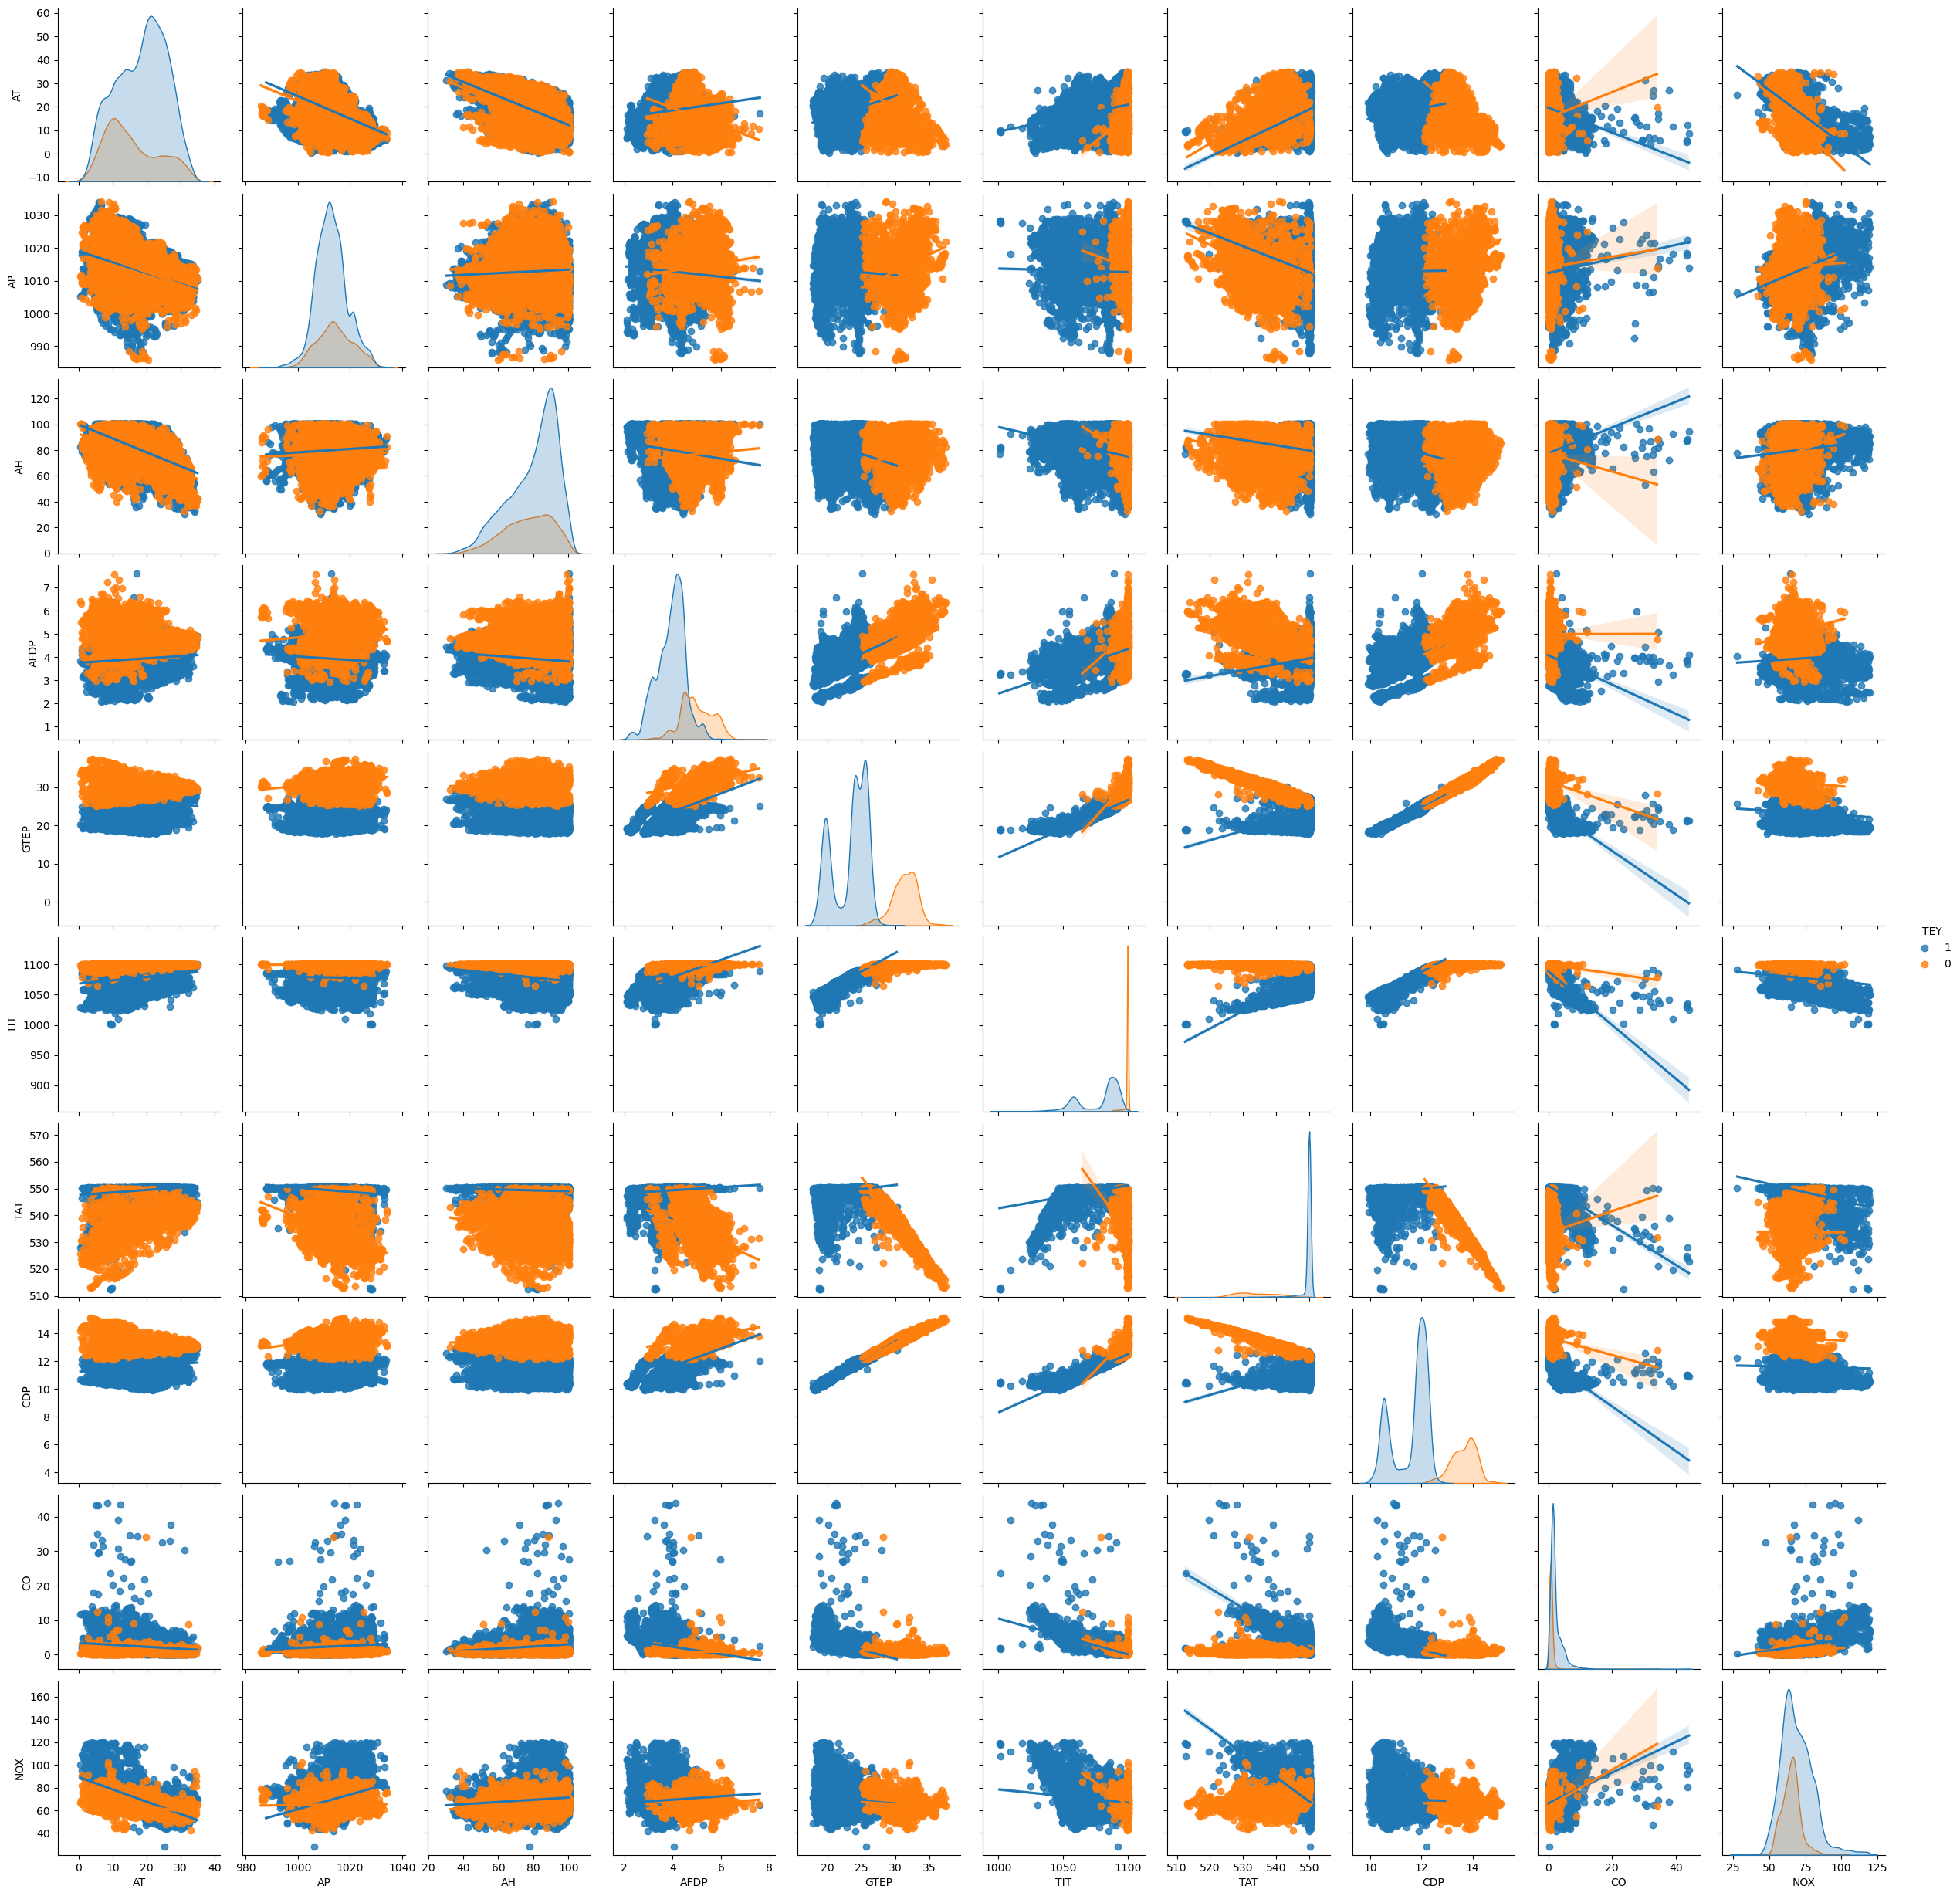

In [27]:
#displaying pairplot to check relationship
#displaying pairplot to check relationship
sns.pairplot(gas_data,x_vars=['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX'], 
                     y_vars=['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX'],
                     hue='TEY',
                     kind='reg',diag_kind='kde')
plt.show()

<h4>Observations:</h4>
1. Some of the features having correltion among each other.<br> 
2. The Compressor discharge pressure (CDP) has high correlation with Gas turbine exhaust pressure (GTEP) which is good to generate high energy yield<br>
3. Also, Compressor discharge pressure (CDP) have relation with Turbine inlet temperature (TIT) and Air filter difference pressure (AFDP)<br>
4. The Turbine inlet temperature (TIT) has correlation with Gas turbine exhaust pressure (GTEP) which is good to generate high energy yield<br>
5. And Gas turbine exhaust pressure (GTEP) has correlation with Air filter difference pressure (AFDP)<br>

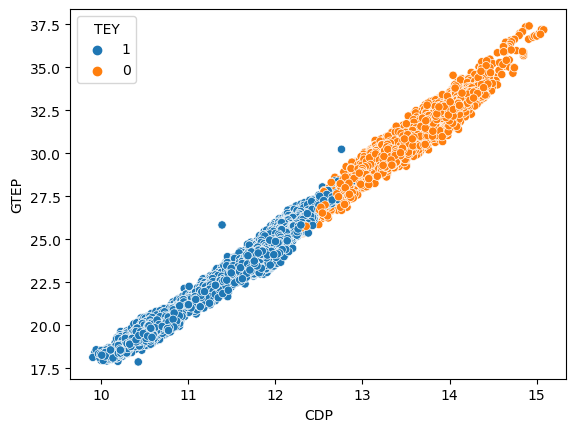

In [28]:
sns.scatterplot(x='CDP',y='GTEP',data=gas_data,hue='TEY')
plt.show()

<h4>Observations:</h4>
The Compressor discharge pressure (CDP) has positive correlation with Gas turbine exhaust pressure (GTEP) which is good to generate high energy yield<br>
As the CDP is increasing with respect to it the GTEP aslo getting incresed <br>
Both the features are important while generating the turbin energy<br>
It has an upward trend which is good has the high turbin energy is getting produced as the both the features are increasing <br>

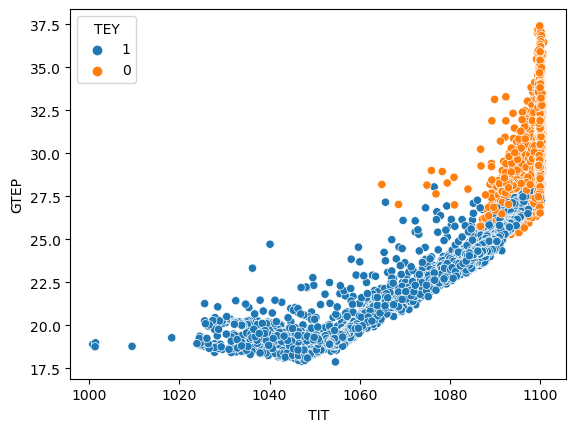

In [29]:
sns.scatterplot(x='TIT',y='GTEP',data=gas_data,hue='TEY')
plt.show()

<h4>Observations:</h4>
The Turbine inlet temperature (TIT) has positive correlation with Gas turbine exhaust pressure (GTEP) which is good to generate high energy yield<br>
As the GTEP is increasing with respect to it the TIT aslo getting incresed <br>
Both the features are important while generating the turbin energy<br>
It has an upward trend which is good has the high turbin energy is getting produced as the both the features are increasing <br>
As the GTEP got increased the turbin energy is getting changed from small to high which is good in production of energy.

In [30]:
cor = gas_data.corr()
cor

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.744740,0.063404,0.009888
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.520783,1.000000,0.316743
NOX,-0.600006,0.256744,0.143061,-0.037299,-0.208496,-0.231636,0.009888,-0.169103,0.316743,1.000000


<AxesSubplot:>

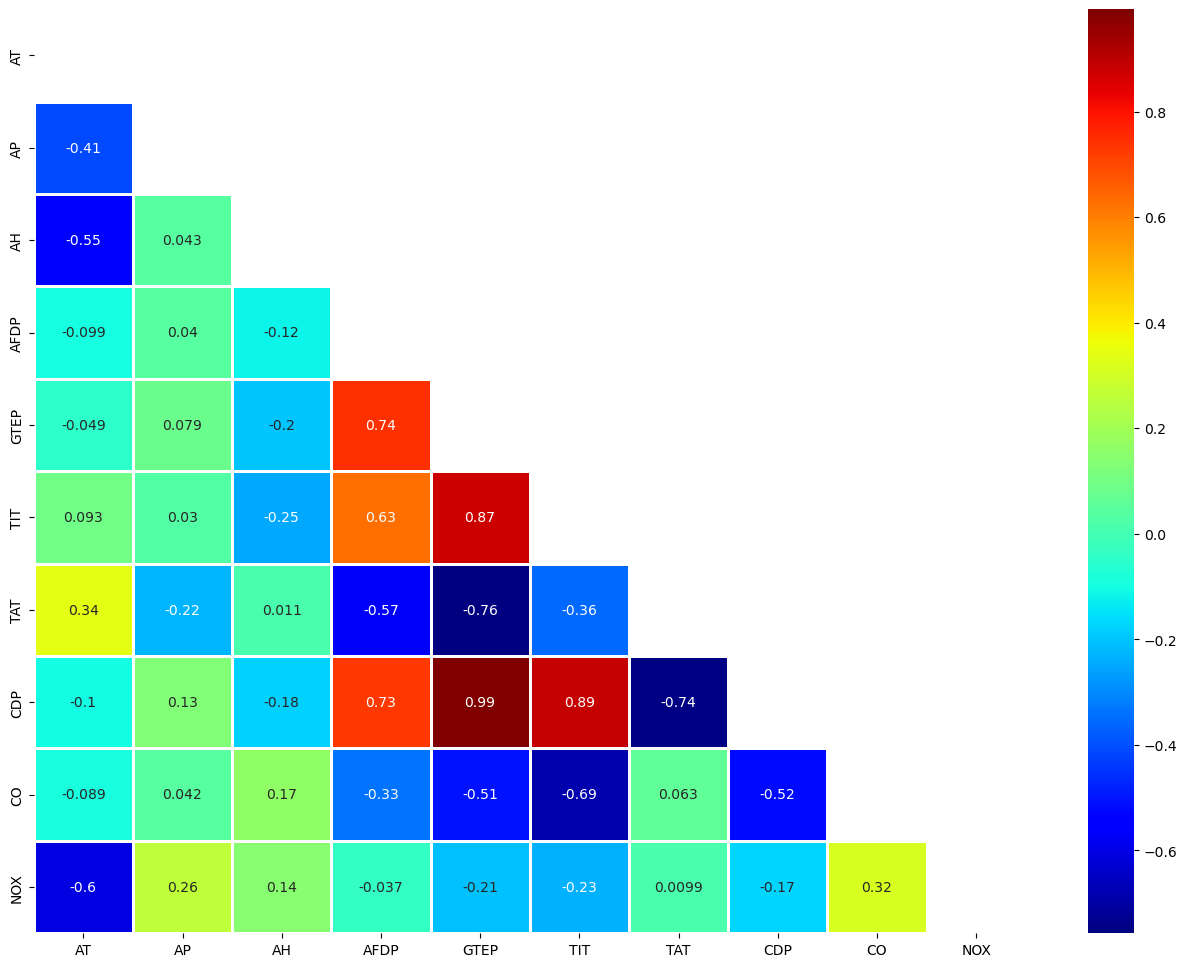

In [31]:
# Having a look at the correlation matrix

plt.figure(figsize=(16,12))
mask = np.zeros_like(gas_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=gas_data.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)

In [32]:
x = gas.drop('TEY', axis=1)
y = gas_data[["TEY"]]

## Feature Engineering
### Univariate Feature Selection

In [33]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split

In [34]:
# feature extraction
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(x, y)

In [35]:
# summarize scores
scores = fit.scores_
features = fit.transform(x)

In [36]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
7,0.537586,CDP
4,0.528565,GTEP
5,0.479568,TIT
6,0.445878,TAT
3,0.243691,AFDP
8,0.137936,CO
9,0.056727,NOX
0,0.029793,AT
1,0.011897,AP
2,0.003688,AH


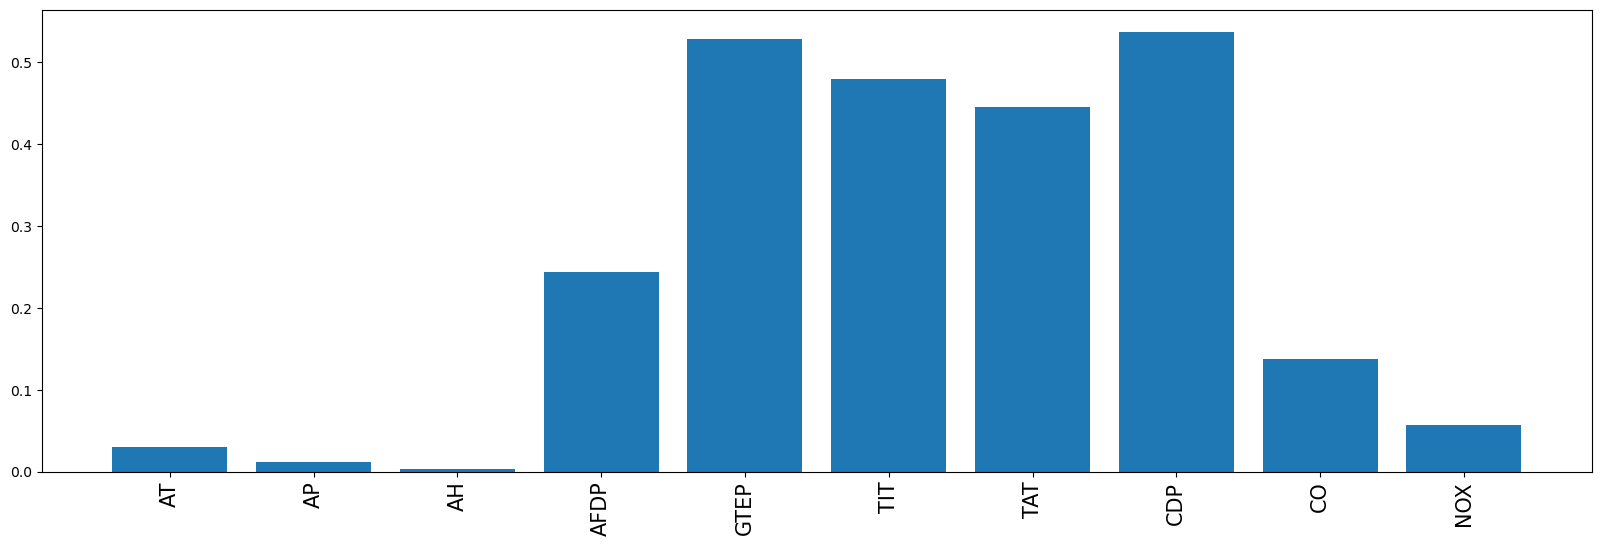

In [37]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

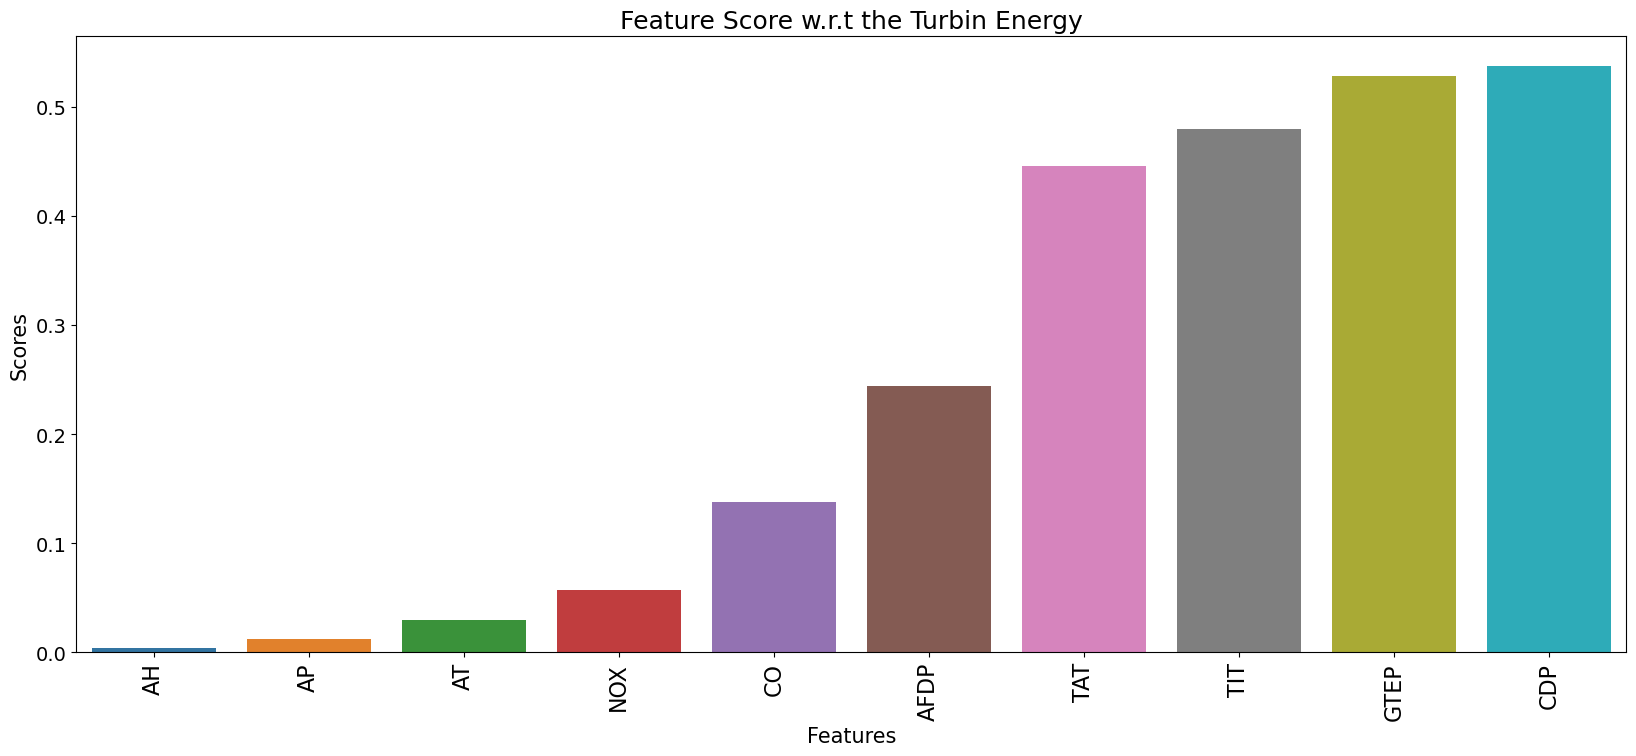

In [38]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Score", 
            data=score_df, 
            order=score_df.sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Turbin Energy", size=18)
plt.show()

<h4>Observations:</h4>
The features such as Compressor discharge pressure (CDP),Gas turbine exhaust pressure (GTEP),Turbine inlet temperature (TIT)
and Turbine after temperature (TAT) as more score which indicates high importance in the dataset.<br>
While, features like Ambient temperature (AT),Ambient pressure (AP),Ambient humidity (AH),Nitrogen oxides (NOx) has low score which shows low impotance in the dataset. 
<br>

## Recursive Feature Elimination

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [40]:
# feature extraction
model = LogisticRegression(max_iter=400)
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(x,y)

In [41]:
# Feature Ranking:
fit.ranking_

array([1, 5, 7, 3, 1, 2, 1, 4, 6, 8])

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
# Standardization
a = StandardScaler()
a.fit(x)
X_standardized = a.transform(x)

In [44]:
X_standardized

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [45]:
y

,TEY
0,1
1,1
2,1
3,1
4,1
...,...
15034,1
15035,1
15036,1
15037,1


In [46]:
# Splitting data into test data and train data
x_train, x_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.3, random_state=3)

In [47]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((10527, 10), (4512, 10), (10527, 1), (4512, 1))

### Keras is an API designed for human beings, not machines. Keras follows best practices for reducing cognitive load: it offers consistent & simple APIs, it minimizes the number of user actions required for common use cases, and it provides clear and actionable feedback upon user error.

In [48]:
# !pip install tensorflow
# !pip install keras

In [49]:
# Importing the necessary packages
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.optimizers import adam_v2

### Tuning of Hyperparameters : Batch Size and Epochs

The batch size is a number of samples processed before the model is updated. The number of epochs is the number of complete passes through the training dataset. The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset.

In [50]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(20,input_dim=10,activation='relu'))
    model1.add(Dense(8,activation='relu'))
    model1.add(Dense(4,activation="relu"))
    model1.add(Dense(units=1,activation="sigmoid"))
    
    adam=Adam(learning_rate=0.001)
    model1.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model1

In [51]:
model1 =KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[10,20,40,50]
epochs=[10,50,100,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(2),verbose=10)

In [52]:
grid_result = grid.fit(x_test,y_test)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV 1/2; 1/16] START batch_size=10, epochs=10...................................
[CV 1/2; 1/16] END ....batch_size=10, epochs=10;, score=0.995 total time=  25.6s
[CV 2/2; 1/16] START batch_size=10, epochs=10...................................
[CV 2/2; 1/16] END ....batch_size=10, epochs=10;, score=0.995 total time=  15.2s
[CV 1/2; 2/16] START batch_size=10, epochs=50...................................
[CV 1/2; 2/16] END ....batch_size=10, epochs=50;, score=0.994 total time= 1.5min
[CV 2/2; 2/16] START batch_size=10, epochs=50...................................
[CV 2/2; 2/16] END ....batch_size=10, epochs=50;, score=0.994 total time= 1.4min
[CV 1/2; 3/16] START batch_size=10, epochs=100..................................
[CV 1/2; 3/16] END ...batch_size=10, epochs=100;, score=0.996 total time= 1.7min
[CV 2/2; 3/16] START batch_size=10, epochs=100..................................
[CV 2/2; 3/16] END ...batch_size=10, epochs=100;

In [53]:
# Summarize the results
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.9953457415103912, using {'batch_size': 10, 'epochs': 100}
0.9946808218955994,0.0 with {'batch_size': 10, 'epochs': 10}
0.9942376017570496,0.0 with {'batch_size': 10, 'epochs': 50}
0.9953457415103912,0.0006649196147918701 with {'batch_size': 10, 'epochs': 100}
0.994902491569519,0.0006648898124694824 with {'batch_size': 10, 'epochs': 200}
0.9926861822605133,0.00022163987159729004 with {'batch_size': 20, 'epochs': 10}
0.995124101638794,0.0 with {'batch_size': 20, 'epochs': 50}
0.9944592118263245,0.00022161006927490234 with {'batch_size': 20, 'epochs': 100}
0.9946808516979218,0.0004432499408721924 with {'batch_size': 20, 'epochs': 200}
0.9935727119445801,0.0019946694374084473 with {'batch_size': 40, 'epochs': 10}
0.9933510720729828,0.0004432499408721924 with {'batch_size': 40, 'epochs': 50}
0.9946808516979218,0.0004432499408721924 with {'batch_size': 40, 'epochs': 100}
0.9944592416286469,0.0015514194965362549 with {'batch_size': 40, 'epochs': 200}
0.9902482330799103,0.00177302956581

### Tuning of Hyperparameters : Learning rate and Drop out rate

Learning rate dropout (LRD) is a new gradient descent technique to motivate faster convergence and better generalization. LRD aids the optimizer to actively explore in the parameter space by randomly dropping some learning rates (to 0); at each iteration, only parameters whose learning rate is not 0 are updated.

In [54]:
# Defining the model

def create_model(dropout_rate,learning_rate):
    model2 = Sequential()
    model2.add(Dense(12,input_dim=10,activation='relu'))
    model2.add(Dense(8,activation='relu'))
    model2.add(Dense(4,activation="relu"))
    model2.add(Dense(units=1,activation="sigmoid"))
    
    adam=Adam(lr=0.001)
    model2.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model2

In [55]:
model2=KerasClassifier(build_fn=create_model,batch_size=10,epochs=100,verbose=0)
dropout_rate=[0.0,0.1,0.2,0.3,0.4,0.5]
learning_rate = [0.001,0.01,0.1]
param_grid=dict(dropout_rate=dropout_rate,learning_rate = learning_rate)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(2),verbose=10)

In [56]:
grid_result2 = grid2.fit(x_test,y_test)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV 1/2; 1/18] START dropout_rate=0.0, learning_rate=0.001......................
[CV 1/2; 1/18] END dropout_rate=0.0, learning_rate=0.001;, score=0.994 total time= 2.4min
[CV 2/2; 1/18] START dropout_rate=0.0, learning_rate=0.001......................
[CV 2/2; 1/18] END dropout_rate=0.0, learning_rate=0.001;, score=0.993 total time= 2.4min
[CV 1/2; 2/18] START dropout_rate=0.0, learning_rate=0.01.......................
[CV 1/2; 2/18] END dropout_rate=0.0, learning_rate=0.01;, score=0.996 total time= 2.4min
[CV 2/2; 2/18] START dropout_rate=0.0, learning_rate=0.01.......................
[CV 2/2; 2/18] END dropout_rate=0.0, learning_rate=0.01;, score=0.995 total time= 2.4min
[CV 1/2; 3/18] START dropout_rate=0.0, learning_rate=0.1........................
[CV 1/2; 3/18] END dropout_rate=0.0, learning_rate=0.1;, score=0.995 total time= 2.4min
[CV 2/2; 3/18] START dropout_rate=0.0, learning_rate=0.1........................
[CV 2/2

In [57]:
# Summarize the results
print('Best {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_["mean_test_score"]
stds = grid_result2.cv_results_["std_test_score"]
params = grid_result2.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.9957889914512634, using {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9935727119445801,0.0006648898124694824 with {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9957889914512634,0.0006648898124694824 with {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.993794322013855,0.0013297796249389648 with {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.9946808516979218,0.0004432499408721924 with {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9955673813819885,0.001773059368133545 with {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.9942375719547272,0.0004432499408721924 with {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9953457415103912,0.0006649196147918701 with {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9942375719547272,0.0004432499408721924 with {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.995124101638794,0.0 with {'dropout_rate': 0.2, 'learning_rate': 0.1}
0.995124101638794,0.0013297796249389648 with {'dropout_rate': 0.3, 'learning_rate': 0.001}
0.9942375719547272,0.00044324994087

### Tuning of Hyperparameters : Activation Function and Kernel Initializer

 The activation function compares the input value to a threshold value. If the input value is greater than the threshold value, the neuron is activated. Kernel Initializers are also known as weight initializers as their main task is to initialize the weights of a neural network

In [58]:
# Defining the model

def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(12,input_dim=10,activation='relu'))
    model3.add(Dropout(0.01))
    model3.add(Dense(8,activation='relu'))
    model3.add(Dropout(0.01))
    model3.add(Dense(4,activation="relu"))
    model3.add(Dropout(0.01))
    model3.add(Dense(units=1,activation="sigmoid"))
    
    adam=Adam(lr=0.001)
    model3.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model3


In [59]:
# Create the model

model3=KerasClassifier(build_fn=create_model,batch_size=10,epochs=100,verbose=0)
activation_function=['softmax','tanh','relu']
init=['normal','uniform','zero']
param_grid=dict(activation_function=activation_function,init=init)
grid3 = GridSearchCV(estimator=model3,param_grid=param_grid,cv=KFold(2),verbose=10)

In [60]:
grid_result3 = grid3.fit(x_test,y_test)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2; 1/9] START activation_function=softmax, init=normal....................
[CV 1/2; 1/9] END activation_function=softmax, init=normal;, score=0.994 total time=  35.1s
[CV 2/2; 1/9] START activation_function=softmax, init=normal....................
[CV 2/2; 1/9] END activation_function=softmax, init=normal;, score=0.994 total time=  33.6s
[CV 1/2; 2/9] START activation_function=softmax, init=uniform...................
[CV 1/2; 2/9] END activation_function=softmax, init=uniform;, score=0.996 total time=  34.7s
[CV 2/2; 2/9] START activation_function=softmax, init=uniform...................
[CV 2/2; 2/9] END activation_function=softmax, init=uniform;, score=0.994 total time=  36.1s
[CV 1/2; 3/9] START activation_function=softmax, init=zero......................
[CV 1/2; 3/9] END activation_function=softmax, init=zero;, score=0.995 total time=  36.4s
[CV 2/2; 3/9] START activation_function=softmax, init=zero.................

In [61]:
# Summarize the results
print('Best {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.9955673813819885, using {'activation_function': 'relu', 'init': 'normal'}
0.9940159618854523,0.00022163987159729004 with {'activation_function': 'softmax', 'init': 'normal'}
0.9951241314411163,0.0008865296840667725 with {'activation_function': 'softmax', 'init': 'uniform'}
0.9949024617671967,0.00022163987159729004 with {'activation_function': 'softmax', 'init': 'zero'}
0.9931294322013855,0.0019946694374084473 with {'activation_function': 'tanh', 'init': 'normal'}
0.993794322013855,0.0004432797431945801 with {'activation_function': 'tanh', 'init': 'uniform'}
0.9946808516979218,0.0004432499408721924 with {'activation_function': 'tanh', 'init': 'zero'}
0.9955673813819885,0.0 with {'activation_function': 'relu', 'init': 'normal'}
0.9944592118263245,0.00022161006927490234 with {'activation_function': 'relu', 'init': 'uniform'}
0.9942376017570496,0.0013297796249389648 with {'activation_function': 'relu', 'init': 'zero'}


### Tuning of Hyperparameter : Number of Neurons in activation layer

The number of neurons range is set to be from 10 to 100. An activation function is a parameter in each layer. Input data are fed to the input layer, followed by hidden layers, and the final output layer

In [62]:
# Defining the model

def create_model(neuron1,neuron2):
    model4 = Sequential()
    model4.add(Dense(neuron1,input_dim = 10,kernel_initializer = 'uniform',activation = 'linear'))
    model4.add(Dropout(0.2))
    model4.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'linear'))
    model4.add(Dropout(0.2))
    model4.add(Dense(1,activation = 'sigmoid'))
    
    adam = adam_v2.Adam(lr = 0.001)
    model4.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model4


In [63]:
# Create the model

model4=KerasClassifier(build_fn=create_model,batch_size=10,epochs=100,verbose=0)
neuron1 = [8,16,24]
neuron2 = [4,8,16]
param_grid=dict(neuron1 = neuron1,neuron2 = neuron2)
grid4 = GridSearchCV(estimator=model4,param_grid=param_grid,cv=KFold(2),verbose=10)


In [64]:
grid_result4 = grid4.fit(x_test,y_test)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/2; 1/9] END .........neuron1=4, neuron2=2;, score=0.992 total time=  34.1s
[CV 2/2; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/2; 1/9] END .........neuron1=4, neuron2=2;, score=0.995 total time=  35.5s
[CV 1/2; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/2; 2/9] END .........neuron1=4, neuron2=4;, score=0.994 total time=  32.8s
[CV 2/2; 2/9] START neuron1=4, neuron2=4........................................
[CV 2/2; 2/9] END .........neuron1=4, neuron2=4;, score=0.995 total time=  32.5s
[CV 1/2; 3/9] START neuron1=4, neuron2=8........................................
[CV 1/2; 3/9] END .........neuron1=4, neuron2=8;, score=0.994 total time=  32.7s
[CV 2/2; 3/9] START neuron1=4, neuron2=8........................................
[CV 2/2; 3/9] END .........neuron1=4, neuron2=8;,

In [65]:
# Summarize the results
print('Best {}, using {}'.format(grid_result4.best_score_,grid_result4.best_params_))
means = grid_result4.cv_results_["mean_test_score"]
stds = grid_result4.cv_results_["std_test_score"]
params = grid_result4.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.9946808516979218, using {'neuron1': 4, 'neuron2': 8}
0.993794322013855,0.0013297796249389648 with {'neuron1': 4, 'neuron2': 2}
0.9944592118263245,0.0006648898124694824 with {'neuron1': 4, 'neuron2': 4}
0.9946808516979218,0.0004432499408721924 with {'neuron1': 4, 'neuron2': 8}
0.9946808516979218,0.0004432499408721924 with {'neuron1': 8, 'neuron2': 2}
0.9946808516979218,0.0004432499408721924 with {'neuron1': 8, 'neuron2': 4}
0.9944592118263245,0.0006648898124694824 with {'neuron1': 8, 'neuron2': 8}
0.9942375719547272,0.0008865296840667725 with {'neuron1': 16, 'neuron2': 2}
0.9944592118263245,0.0006648898124694824 with {'neuron1': 16, 'neuron2': 4}
0.9946808516979218,0.0004432499408721924 with {'neuron1': 16, 'neuron2': 8}


In [66]:
def toFindBestParams(x_train, y_train, x_test, y_test):

    
    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]
           
    # initializing the trials
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))
            
            # Defining the Second layer of the model
            model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
 
            # Compiling the model
            model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])
 
            # Fitting the ANN to the Training set
            model_trained = model.fit(x_train, y_train ,batch_size = batch_trial, epochs = epochs_trial, verbose=0)
               
             # Fetching the accuracy of the training
            Accuracy_train = model_trained.history['accuracy'][-1]   
            
            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',Accuracy_train)

# Calling the function
toFindBestParams(x_train, y_train, x_test, y_test)

batch_size: 5 - epochs: 5 Accuracy: 0.997150182723999
batch_size: 5 - epochs: 10 Accuracy: 0.997150182723999
batch_size: 5 - epochs: 50 Accuracy: 0.9981001019477844
batch_size: 5 - epochs: 100 Accuracy: 0.9985750913619995
batch_size: 10 - epochs: 5 Accuracy: 0.997150182723999
batch_size: 10 - epochs: 10 Accuracy: 0.9976251721382141
batch_size: 10 - epochs: 50 Accuracy: 0.9983851313591003
batch_size: 10 - epochs: 100 Accuracy: 0.9982901215553284
batch_size: 15 - epochs: 5 Accuracy: 0.9969602227210999
batch_size: 15 - epochs: 10 Accuracy: 0.9975301623344421
batch_size: 15 - epochs: 50 Accuracy: 0.9983851313591003
batch_size: 15 - epochs: 100 Accuracy: 0.9990500807762146
batch_size: 20 - epochs: 5 Accuracy: 0.997150182723999
batch_size: 20 - epochs: 10 Accuracy: 0.9976251721382141
batch_size: 20 - epochs: 50 Accuracy: 0.9981001019477844
batch_size: 20 - epochs: 100 Accuracy: 0.9985750913619995


### Training model with optimum values of Hyperparameters

The hyperparameter optimization was carried out by taking 2 hyperparameters at once. We may have missed the best values. The performance can be further improved by finding the optimum values of hyperparameters all at once given by the code snippet below.

In [67]:
#create ANN model

model = Sequential()
model.add(Dense(4,input_dim = 10,kernel_initializer = 'normal',activation='tanh'))
model.add(Dropout(0.0))
model.add(Dense(8,kernel_initializer = 'normal',activation='tanh'))
model.add(Dropout(0.0))
# model.add(Dense(4,kernel_initializer = 'normal',activation='tanh'))
# model.add(Dropout(0.0))
model.add(Dense(units=1, kernel_initializer='normal',activation = 'sigmoid'))
    
adam = adam_v2.Adam(lr = 0.001)
model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])

In [68]:
model.summary()

Model: "sequential_124"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_461 (Dense)           (None, 12)                132       
                                                                 
 dropout_95 (Dropout)        (None, 12)                0         
                                                                 
 dense_462 (Dense)           (None, 8)                 104       
                                                                 
 dropout_96 (Dropout)        (None, 8)                 0         
                                                                 
 dense_463 (Dense)           (None, 4)                 36        
                                                                 
 dropout_97 (Dropout)        (None, 4)                 0         
                                                                 
 dense_464 (Dense)           (None, 1)              

In [69]:
# Training the model with best parameters
history = model.fit(x_train, y_train, validation_split=0.3, batch_size = 15, epochs = 100)

Epoch 1/100
737/737 [==============================] - 3s 3ms/step - loss: 0.2317 - accuracy: 0.9729 - val_loss: 0.0705 - val_accuracy: 0.9934
Epoch 2/100
737/737 [==============================] - 2s 2ms/step - loss: 0.0514 - accuracy: 0.9954 - val_loss: 0.0363 - val_accuracy: 0.9937
Epoch 3/100
737/737 [==============================] - 2s 2ms/step - loss: 0.0307 - accuracy: 0.9961 - val_loss: 0.0205 - val_accuracy: 0.9962
Epoch 4/100
737/737 [==============================] - 2s 2ms/step - loss: 0.0208 - accuracy: 0.9963 - val_loss: 0.0140 - val_accuracy: 0.9968
Epoch 5/100
737/737 [==============================] - 2s 2ms/step - loss: 0.0149 - accuracy: 0.9971 - val_loss: 0.0143 - val_accuracy: 0.9962
Epoch 6/100
737/737 [==============================] - 2s 2ms/step - loss: 0.0135 - accuracy: 0.9966 - val_loss: 0.0151 - val_accuracy: 0.9946
Epoch 7/100
737/737 [==============================] - 2s 2ms/step - loss: 0.0110 - accuracy: 0.9970 - val_loss: 0.0128 - val_accuracy: 0.9965

Epoch 58/100
737/737 [==============================] - 2s 2ms/step - loss: 0.0063 - accuracy: 0.9981 - val_loss: 0.0115 - val_accuracy: 0.9965
Epoch 59/100
737/737 [==============================] - 2s 2ms/step - loss: 0.0063 - accuracy: 0.9982 - val_loss: 0.0142 - val_accuracy: 0.9962
Epoch 60/100
737/737 [==============================] - 2s 2ms/step - loss: 0.0057 - accuracy: 0.9980 - val_loss: 0.0165 - val_accuracy: 0.9962
Epoch 61/100
737/737 [==============================] - 2s 2ms/step - loss: 0.0066 - accuracy: 0.9978 - val_loss: 0.0122 - val_accuracy: 0.9956
Epoch 62/100
737/737 [==============================] - 2s 2ms/step - loss: 0.0064 - accuracy: 0.9977 - val_loss: 0.0172 - val_accuracy: 0.9959
Epoch 63/100
737/737 [==============================] - 2s 2ms/step - loss: 0.0069 - accuracy: 0.9985 - val_loss: 0.0131 - val_accuracy: 0.9959
Epoch 64/100
737/737 [==============================] - 2s 2ms/step - loss: 0.0061 - accuracy: 0.9981 - val_loss: 0.0165 - val_accuracy:

In [70]:
model.weights

[<tf.Variable 'dense_461/kernel:0' shape=(10, 12) dtype=float32, numpy=
 array([[ 3.78385067e-01,  3.40719819e-01, -3.73382658e-01,
          3.26761127e-01,  3.54934454e-01, -3.82567406e-01,
          3.86470437e-01,  3.41974437e-01,  4.05538499e-01,
          3.01296085e-01, -1.06633611e-01, -3.79049689e-01],
        [-2.17259442e-03, -1.39500182e-02, -1.80514287e-02,
          1.87043976e-02,  1.50984218e-02, -7.09946174e-03,
          4.19313014e-02, -1.95535948e-03,  5.76629899e-02,
         -2.70210244e-02, -6.32624403e-02, -3.61889973e-02],
        [ 1.28519740e-02, -1.10707255e-02,  2.67759655e-02,
         -5.42463968e-04,  2.63656862e-02, -2.66182479e-02,
          6.12650737e-02,  5.67249805e-02,  3.70465778e-02,
         -5.62385023e-02,  5.56634724e-01, -1.46641359e-02],
        [ 5.97398318e-02,  5.87274060e-02,  1.62549242e-02,
         -1.28036654e-02,  2.87008937e-02,  5.10073546e-03,
          1.45983761e-02,  2.20027566e-02,  2.29284763e-02,
         -1.01819253e-02,

In [71]:
# evaluate the model
scores = model.evaluate(X_standardized,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 1s 1ms/step - loss: 0.0084 - accuracy: 0.9972
accuracy: 99.72%


In [72]:
# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

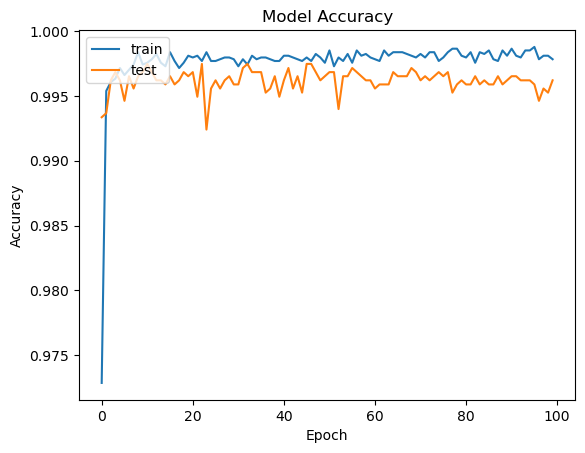

In [73]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

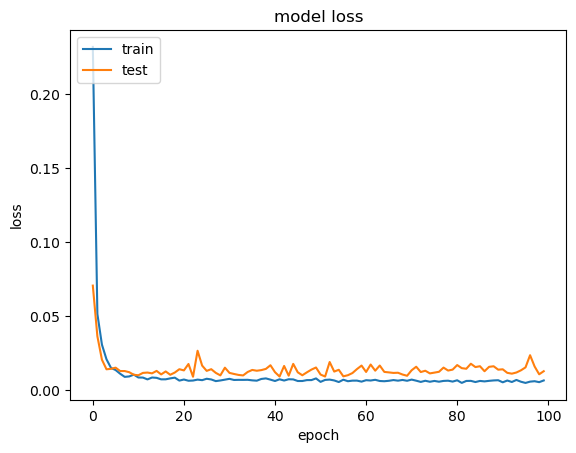

In [74]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The training-error converged but the testing error didn't converge and conincide with the training error . Hence, We can do better with Hyperparameter Tuning all the parameters which is computationally Expensive.

## Predicting values from Model using same dataset

In [81]:
# generating predictions for test data
y_predict_test = model.predict(x_test) 

# creating table with test price & predicted price for test
test_prediction = pd.DataFrame()
test_prediction['Test_Actual'] = y_test
test_prediction['Test_Probability'] = y_predict_test
def probToBinary(varProb):
    if varProb >= 0.5:
        return 1
    else:
        return 0

# converting the probability of target variable to binary class of test data
test_prediction['Test_Predicted'] = test_prediction['Test_Probability'].apply(probToBinary)
print(test_prediction.shape)
test_prediction.head(10)

141/141 [==============================] - 0s 2ms/step
(4512, 3)


,Test_Actual,Test_Probability,Test_Predicted
8185,0,0.000016,0
8994,1,0.999919,1
8944,0,0.000016,0
3451,1,0.999992,1
8236,1,0.999976,1
3508,1,0.999978,1
6768,1,0.999970,1
11903,0,0.000042,0
9257,0,0.000016,0
2911,1,0.999984,1


In [82]:
# generating predictions for train data
y_predict_train = model.predict(x_train)

# creating table with test price & predicted price for test
train_prediction = pd.DataFrame()
train_prediction['Train_Actual'] = y_train
train_prediction['Train_Probability'] = y_predict_train
train_prediction['Train_Predicted'] = train_prediction['Train_Probability'].apply(probToBinary)
print(train_prediction.shape)
train_prediction.head(10)

329/329 [==============================] - 0s 1ms/step
(10527, 3)


,Train_Actual,Train_Probability,Train_Predicted
13383,1,0.999890,1
13172,1,0.999981,1
8356,1,0.999985,1
2683,0,0.000018,0
3266,1,0.999979,1
2371,0,0.000018,0
907,1,0.997467,1
3713,1,0.999992,1
762,1,0.999992,1
7029,1,0.999979,1


## Classification Report

In [83]:
# print the classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Classification Report for Test Data  =\n", classification_report(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))

Classification Report for Test Data  =
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1170
           1       1.00      1.00      1.00      3342

    accuracy                           1.00      4512
   macro avg       1.00      0.99      1.00      4512
weighted avg       1.00      1.00      1.00      4512



In [84]:
# print the classification report
print("Classification Report for Train Data  =\n", classification_report(train_prediction['Train_Actual'],train_prediction['Train_Predicted']))

Classification Report for Train Data  =
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      2645
           1       1.00      1.00      1.00      7882

    accuracy                           1.00     10527
   macro avg       1.00      1.00      1.00     10527
weighted avg       1.00      1.00      1.00     10527



In [85]:
# print the scores on training and test set
y_predict_test = model.predict(x_test) 
y_predict_train = model.predict(x_train)
print('Training set score: {:.2f}%'.format(accuracy_score(train_prediction['Train_Actual'], train_prediction['Train_Predicted'])*100))

print('Test set score: {:.2f}%'.format(accuracy_score(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])*100))

329/329 [==============================] - 0s 1ms/step
Training set score: 99.76%
Test set score: 99.62%


<h3>Insights:</h3>
<br>
We have Predict turbine energy yield (TEY) using ambient variables as features<br>
The most important features where Air filter difference pressure (AFDP),Gas turbine exhaust pressure (GTEP),Turbine inlet temperature (TIT) which can be used to produce high turbine energy <br>
We got the <b> loss: 0.0084 and accuracy: 0.9972 </b> after evaluating the model which is good enough though the loss is too low<br>
we have used model validation techniques, feature engineering<br>
we done optimization for getting more accuracy <br>
first we tunned hypermeters separately for checking which are the best scores and best parameters<br>
Then, at the final we trained model with optimum values of Hyperparameters<br>
We got the <b>Train Accuracy :  99.76% </b> and <b>Test Accuracy : 99.62%</b>